# Video Game Sales Over The Years

***

## Introduction

The dataset I have chosen to investigate for my project is based on video games. I chose this dataset because I have a keen interest in video games and I believe that they have become more popular since covid-19 so I decided to test my theory. I researched ready available datasets online and settled on a dataset that had the most recent data. I found my dataset on a website called [Kaggle](https://www.kaggle.com/code/holmjason2/video-game-sales-analysis). I decided to use the number of sales per game as a measure.[4][5]

### The Dataset
The dataset contains 7 columns:
1. <b>Rank</b>(int) - Ranks the video games based on the Total_Shipped column with No.1 being the game with max value
2. <b>Name</b>(object) - Name of the video game
3. <b>Platform</b>(object) - The console the game was sold for 
4. <b>Publisher</b>(object) - The video game company that published the game
5. <b>Developer</b>(object) - The software developement department within the company that made the game
6. <b>Critic_Score</b>(float) - Score given by critics
7. <b>User_Score</b>(float)- Score given by players
8. <b>Total_Shipped</b>(float) - Total amount of games shipped after purchased by players
9. <b>Year</b>(int) - Year the game was released

In [58]:
#Necessary Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
#Read in csv file containing video game data
dataset = pd.read_csv("game_sales_data.csv",encoding='latin1')
dataset.head()

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017


### Exploratory Analysis
***

In [60]:
dataset.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Year
count,19600.000000,9969.000000,2223.000000,19600.000000,19600.000000
mean,9798.539133,7.034848,6.994872,0.551123,2007.789949
std,5658.110539,1.558968,1.517038,1.671466,6.326169
min,1.000000,0.800000,1.000000,0.010000,1977.000000
25%,4898.750000,6.100000,6.300000,0.050000,2004.000000
50%,9798.500000,7.300000,7.200000,0.160000,2008.000000
75%,14698.250000,8.200000,8.000000,0.460000,2012.000000
max,19598.000000,10.000000,10.000000,82.900000,2020.000000


### Dataset Information:
Using the table above we can see some information about the dataset. The "count" row shows us the number of rows under each column, the "mean" gives us the average value, "std" stands for standard deviation of values in each column, "min" shows the smallest value recorded, "25%" and "50%" and "75%" are all percentiles where "50%" is also called the median and lastly "max" stands for the largest value in each column.

After reading through this summary of the dataset I can see there are less rows under the columns "Critic_Score" and "User_Score" than the other three columns due to there being some values missing but since I'm mainly interested in sales I'm not too concerned. I can see there are 19600 rows of sales data and the "min" value under "Year" appears to be 1977 therefore I'm going to change my dataset to only look at sales from 1990 onwards since I don't have much interest in years before that.

In [61]:
#dataset.loc locates all the columns under Year and the locates all the values equal to or greater than 1990
dataset= dataset.loc[dataset.loc[:,'Year']>= 2000]
dataset.head()

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017
5,6,Minecraft,PC,Mojang,Mojang AB,10.0,7.8,33.15,2010


Check that the new dataset goes back as far 2000:

In [62]:
#Min value of column 'Year'
np.min(dataset['Year'])

2000

In [63]:
#check how many rows of data we have now
dataset.count()

Rank             17682
Name             17682
Platform         17682
Publisher        17682
Developer        17680
Critic_Score      9198
User_Score        2191
Total_Shipped    17682
Year             17682
dtype: int64

Next we can get rid of the columns in the dataset that we don't need and that are not appropriate for the further data analysis

In [64]:
#getting rid of columns 
dataset=dataset.drop(['Name', 'Platform','Publisher','Developer'], axis=1)

In [65]:
dataset.mean()

Rank             10064.888191
Critic_Score         7.031474
User_Score           6.974076
Total_Shipped        0.517876
Year              2009.154394
dtype: float64

## Analysis Of Relationships Between Variables

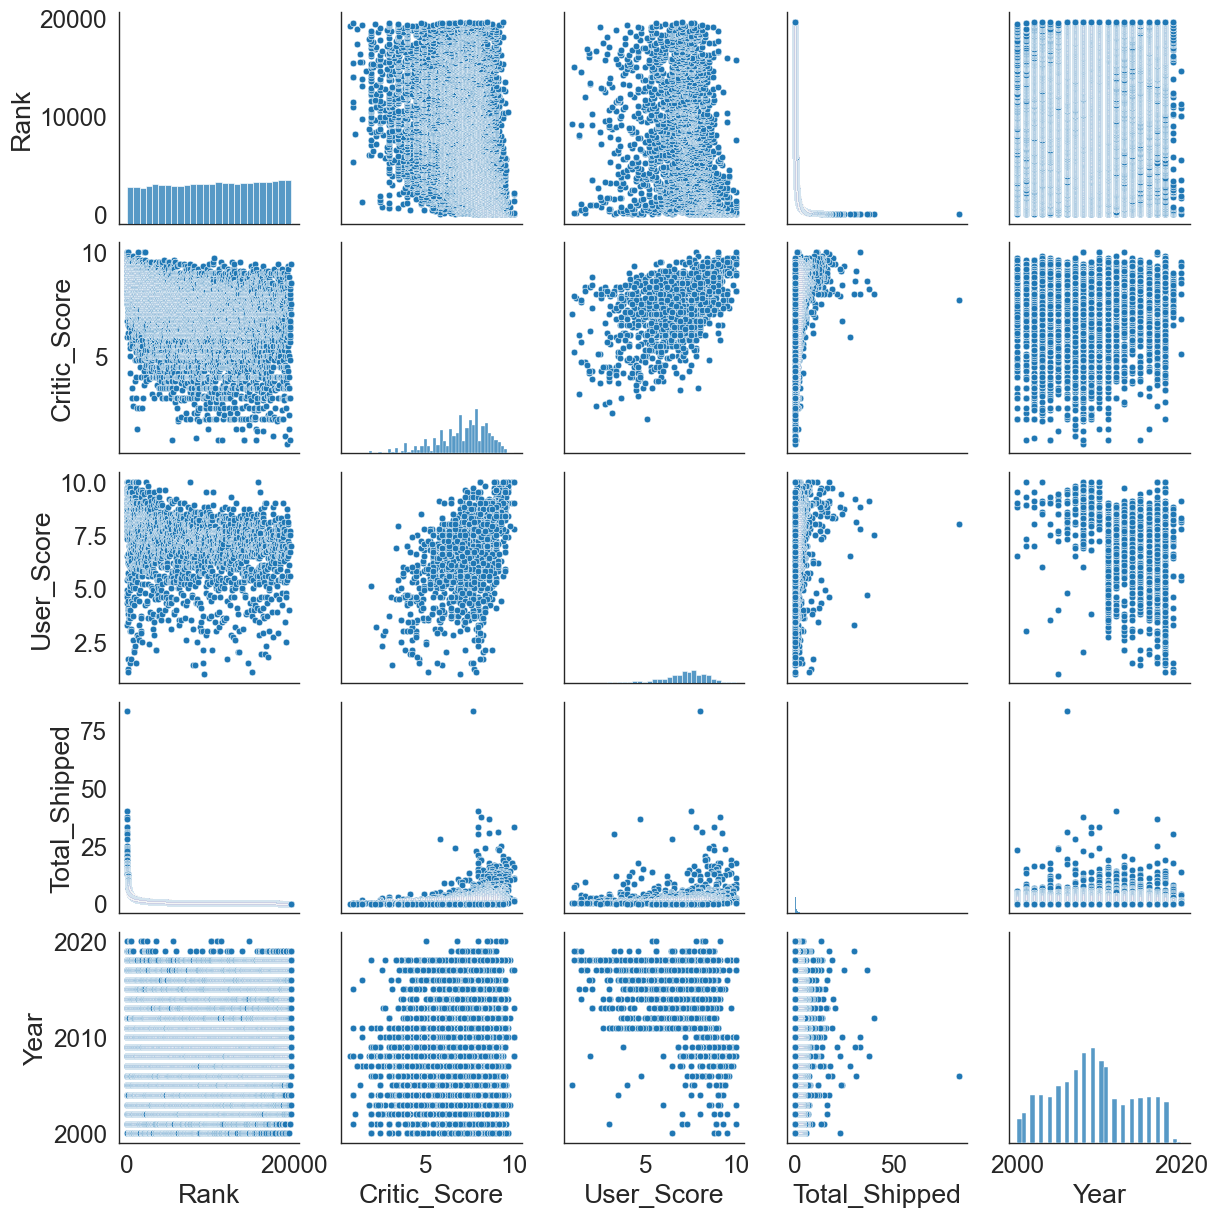

In [66]:
sns.pairplot(dataset)

In [67]:
dataset.corr()

,Rank,Critic_Score,User_Score,Total_Shipped,Year
Rank,1.000000,-0.349334,-0.191003,-0.418272,0.120611
Critic_Score,-0.349334,1.000000,0.508592,0.230509,0.075076
User_Score,-0.191003,0.508592,1.000000,0.125765,-0.240227
Total_Shipped,-0.418272,0.230509,0.125765,1.000000,0.001499
Year,0.120611,0.075076,-0.240227,0.001499,1.000000


### Analysis:

The pairplots accompanied by the above correlation table shows us the relationships between each of the variables. From initially analysing the pairplots I would have said the strongest relationship was between 'Rank' and 'Total_Shipped' but the strongest correlation coefficient appears to be between 'Critic_Score' and 'User_Score' with a value of 0.508592 which is the closest value to 1 and since it's positive we know as one variable increases in value so those the other variable which makes sense because if Users give a high score then critics are more likely to give a high score and vice versa.

***

### Relationship With Sales:

Now lets have a closer look at the factors affecting sales. I didn't include 'Rank' because this variable is created based on sales we know it's a measure from max sales to min sales. I also included 'Year' as a variable because even though it's correlation coefficient with 'Total Shipped' is very weak that just means that there is not a linear relationship between them but I want to see in which years video games were more popular.

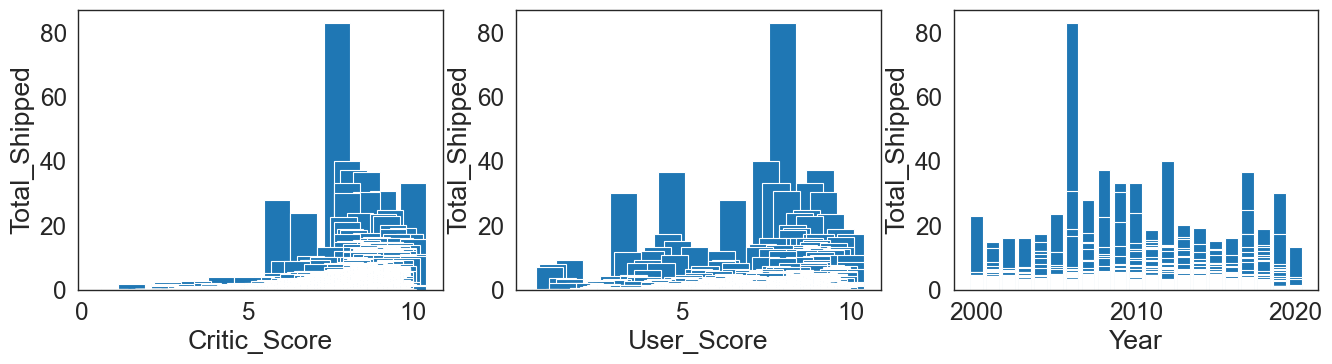

In [68]:
#Make 3 adjacent plots [1],[2],[3]
plt.figure(figsize=(16,8))

x= dataset['Critic_Score']
y= dataset['Total_Shipped']

plt.subplot(2, 3, 1)
plt.xlabel("Critic_Score")
plt.ylabel("Total_Shipped")
plt.bar(x,y)

x = dataset['User_Score']
y= dataset['Total_Shipped']

plt.subplot(2, 3, 2)
plt.xlabel("User_Score")
plt.ylabel("Total_Shipped")
plt.bar(x,y)

x =dataset['Year']
y= dataset['Total_Shipped']

plt.subplot(2, 3, 3)
plt.xlabel("Year")
plt.ylabel("Total_Shipped")
plt.bar(x,y)

plt.show()

## Synthesising Time Series Data:

### Researching possible methods:

There are multiple ways to synthesise time series data, some of the ways I found while researching were the ARIMA method which uses past data to predict long term data. It does this using 'differencing' which essentially makes sure the data is stationary because this model cannot be used with non-stationary time series data. This means that if the data is dependant on the year, i.e variables increase/decrease proportionally as the time increases, it will not work so differencing takes the difference between each of the data points (not including time variable) and plots the distance between them[17]. However, differencing proved to be quite complicated therefore I chose not to use it.

Another method I explored was using the open source sofware called 'Prophet' which was developed by Facebook. This method uses past data and fits it to a model and that model is then used to synthesise a new set of data that is based on historical data. It uses the trend of previous data to get parameters to predict the pattern of new data [18]. When attempting to use this method I had difficulties installing all the packages needed on my machine.

Finally the last method I explored was using the 'Fitter' library to find the distribution of the variables in my dataset. Then using numpy and scipy I generated arrays with random variables based on the distribution of their corresponding columns. I created a new dataframe with all the arrays as columns which resulted in a new synthesised dataset.

In [69]:
#check data type of year column
dataset['Year']

0        2006
2        2012
3        2008
4        2017
5        2010
         ... 
19595    2004
19596    2003
19597    2002
19598    2017
19599    2009
Name: Year, Length: 17682, dtype: int64

In [70]:
#Convert Year column to datetime []
dataset['Year']=pd.to_datetime(dataset['Year'], format = '%Y')

In [71]:
#check Year column 
dataset.head(60)

,Rank,Critic_Score,User_Score,Total_Shipped,Year
0,1,7.7,8.0,82.90,2006-01-01
2,3,8.0,7.5,40.00,2012-01-01
3,4,8.2,9.1,37.32,2008-01-01
4,5,8.6,4.7,36.60,2017-01-01
5,6,10.0,7.8,33.15,2010-01-01
6,7,8.0,8.8,33.13,2009-01-01
8,9,9.1,8.1,30.80,2006-01-01
9,10,8.6,9.2,30.30,2009-01-01
11,12,8.0,3.3,30.13,2019-01-01
13,14,5.9,6.5,28.02,2007-01-01


<AxesSubplot: xlabel='Year'>

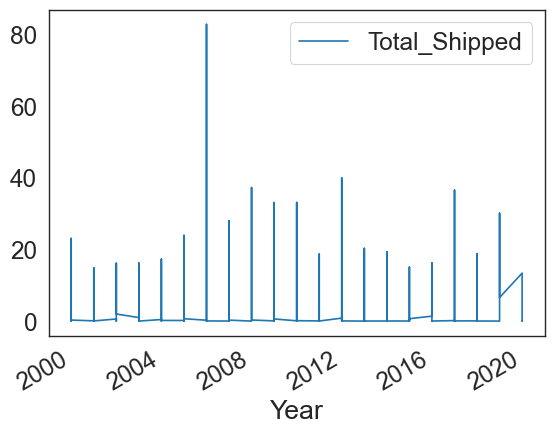

In [72]:
dataset.plot('Year','Total_Shipped')

In [73]:
dataset['Total_Shipped'].groupby([dataset['Year'].dt.year]).agg('count')

Year
2000     412
2001     508
2002     821
2003     813
2004     785
2005     964
2006    1035
2007    1236
2008    1536
2009    1616
2010    1401
2011    1299
2012     755
2013     639
2014     755
2015     759
2016     780
2017     789
2018     703
2019      63
2020      13
Name: Total_Shipped, dtype: int64

In [81]:
#[6][7]
idx= pd.date_range("2000", periods= 25, freq= "A")
idx

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

<AxesSubplot: xlabel='Year'>

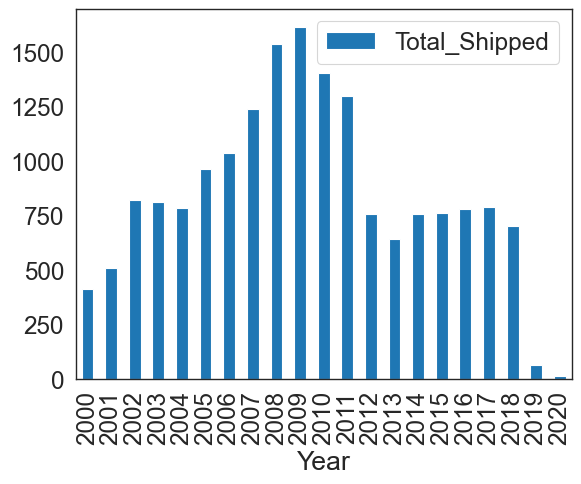

In [39]:
#Make a new dataframe with the total_shipped column grouped by column to show sum for each year [11][12]
X=dataset['Total_Shipped'].groupby([dataset['Year'].dt.year]).agg('count')
df = pd.DataFrame(X)
df.plot(kind='bar')

Fitting 5 distributions: 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000211,1521.166410,-232.540916,inf,0.185611,4.140214e-01
norm,0.000211,1519.136566,-235.579618,inf,0.187197,4.036369e-01
beta,0.000217,1485.201036,-228.951083,inf,0.188929,3.924776e-01
burr,0.000217,1488.043410,-228.893051,inf,0.183970,4.249245e-01
lognorm,0.000253,1956.882709,-228.747748,inf,0.689741,1.750152e-10


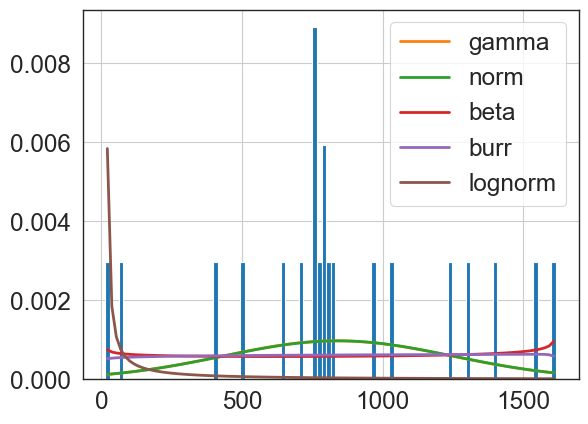

In [40]:
#Use Fitter function to find the best distribution fit for the data [10]
from fitter import Fitter, get_common_distributions, get_distributions
height = df.values
f = Fitter(df,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [55]:
#Get gamma parameters
f.get_best(method = 'sumsquare_error')

{'gamma': {'a': 7627.553647162548,
  'loc': -34791.25290379902,
  'scale': 4.671640420290115}}

In [79]:
#Create an array of data randomly generated using gamma distribution and parameters we got above
syn_data=np.random.gamma(shape=7627.55, scale=4.67, size=25)

In [86]:
#Create a dataframe with new data
ts = pd.DataFrame(data= syn_data,index=idx, columns=[["Total_Shipped"]])
ts

,Total_Shipped
2000-12-31,36016.133813
2001-12-31,35133.353533
2002-12-31,35653.493232
2003-12-31,35887.719162
2004-12-31,35184.758981
2005-12-31,36113.997006
2006-12-31,36198.643411
2007-12-31,35376.821457
2008-12-31,35786.498308
2009-12-31,35432.768268


Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]


{'burr': {'c': 32.97619267840606,
  'd': 1.143711790990037,
  'loc': -0.205383793331543,
  'scale': 7.358217257409768}}

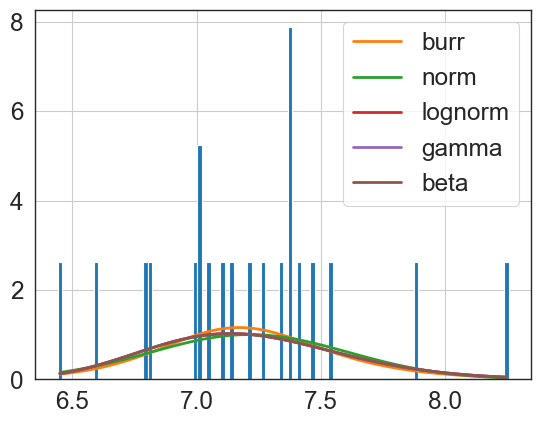

In [113]:
#Create an array of the average critic score for each year 
criticScores=dataset['Critic_Score'].groupby([dataset['Year'].dt.year]).agg('mean')

height = criticScores.values
f = Fitter(height,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')


In [114]:
#Generate random Variables using burr12 distribution [14] [15]
from scipy.stats import burr12
CriticScores = burr12.rvs(c=32.98, d=1.14, scale= 7.36,size=25, loc=-0.21)
CriticScores

array([7.11526854, 7.11283241, 7.52512655, 6.90311278, 6.6279225 ,
       6.22200208, 7.28615015, 6.1441928 , 6.92535461, 7.20688555,
       6.34034905, 6.82580693, 7.25327021, 6.64919477, 6.65274486,
       6.55520795, 7.68450726, 6.93774062, 6.55719989, 6.72099766,
       6.70646686, 8.73849315, 7.14512645, 6.99522426, 6.92981464])

Fitting 5 distributions: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]


{'beta': {'a': 0.48652524289594745,
  'b': 0.4272295729631518,
  'loc': 6.449988366283584,
  'scale': 2.3318298155345976}}

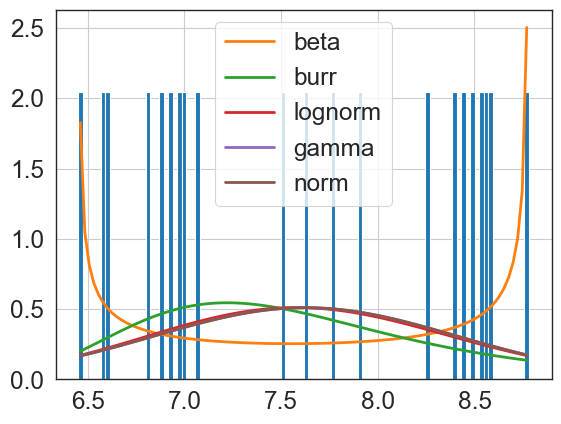

In [109]:
#Create an array of the average user score for each year 
UserScores=dataset['User_Score'].groupby([dataset['Year'].dt.year]).agg('mean')

height = UserScores.values
f = Fitter(height,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

In [110]:
UserScore=np.random.beta(a=0.49,b=0.43,size=25)
UserScore

array([0.30570701, 0.35755663, 0.64707963, 0.30173636, 0.01564086,
       0.93071226, 0.91151951, 0.90928512, 0.32138759, 0.03515824,
       0.89765294, 0.03942201, 0.19574543, 0.80845318, 0.77586966,
       0.03454157, 0.74564651, 0.96370555, 0.65844381, 0.89389304,
       0.22945465, 0.82342232, 0.60129527, 0.395612  , 0.99717238])

In [115]:
#add in new sythesised columns[16]
ts['CriticScores']= CriticScores
ts['UserScores']= UserScore
ts

,Total_Shipped,CriticScores,UserScores
2000-12-31,36016.133813,7.115269,0.305707
2001-12-31,35133.353533,7.112832,0.357557
2002-12-31,35653.493232,7.525127,0.647080
2003-12-31,35887.719162,6.903113,0.301736
2004-12-31,35184.758981,6.627923,0.015641
2005-12-31,36113.997006,6.222002,0.930712
2006-12-31,36198.643411,7.286150,0.911520
2007-12-31,35376.821457,6.144193,0.909285
2008-12-31,35786.498308,6.925355,0.321388
2009-12-31,35432.768268,7.206886,0.035158


## References

[1] https://www.folkstalk.com/tech/matplotlib-figure-size-not-working-with-code-examples/

[2] https://www.w3schools.com/python/matplotlib_subplot.asp

[3] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

[4] https://github.com/ZainNasrullah/VGChartz-VideoGameSales-Analysis/blob/master/Project.ipynb

[5] https://www.kaggle.com/code/holmjason2/video-game-sales-analysis/notebook

[6] https://towardsdatascience.com/creating-synthetic-time-series-data-67223ff08e34

[7] https://stackoverflow.com/questions/32168848/how-to-create-a-pandas-datetimeindex-with-year-as-frequency

[8] https://www.analyticsvidhya.com/blog/2022/06/time-series-forecasting-using-python/

[9] https://stackoverflow.com/questions/46658232/pandas-convert-column-with-year-integer-to-datetime

[10] https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

[11] https://stackoverflow.com/questions/59204445/how-to-do-i-groupby-count-and-then-plot-a-bar-chart-in-pandas

[12] https://stackoverflow.com/questions/36106490/how-to-get-unique-values-from-multiple-columns-in-a-pandas-groupby

[13] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html

[14] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.burr12.html#scipy.stats.burr12

[15] https://stackoverflow.com/questions/51911597/burr-distribution-in-scipy-stats

[16] https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

[17] https://www.projectpro.io/article/how-to-build-arima-model-in-python/544#:~:text=Model%20in%20Python%3F-,ARIMA%20Model%2D%20Complete%20Guide%20to%20Time%20Series%20Forecasting%20in%20Python,data%20to%20predict%20future%20values.

[18] https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/